<a href="https://colab.research.google.com/github/rameshboggu36/California_Housing_Price_Prediction/blob/master/California_Housing_Price_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __California Housing Price Prediction__

* Predict the house price in California using the dataset of housing with the help of different ML models.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = '/content/drive/MyDrive/Colab Notebooks/housing.csv'
data = pd.read_csv(path)

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## __Understanding the Data__:

In [4]:
data.shape

(20640, 10)

In [5]:
data.size

206400

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# checking for null values
data.isnull().sum()/len(data)*100

,0
longitude,0.000000
latitude,0.000000
housing_median_age,0.000000
total_rooms,0.000000
total_bedrooms,1.002907
population,0.000000
households,0.000000
median_income,0.000000
median_house_value,0.000000
ocean_proximity,0.000000


* here total_bedrooms feature having missing values of 1% and these are of Missing At Random type missing values as total_bedrooms depends on total_rooms.

In [8]:
from scipy.interpolate import interp1d
df = data.copy(deep=True)
valid_data = df.dropna(subset=['total_bedrooms', 'total_rooms'])

# Create an interpolation function using valid total_rooms and total_bedrooms values
interp_func = interp1d(valid_data['total_rooms'], valid_data['total_bedrooms'], kind='linear', fill_value='extrapolate')

# Define a function to apply the interpolation
def interpolate_total_bedrooms(row):
    if pd.isna(row['total_bedrooms']):
        return interp_func(row['total_rooms'])
    else:
        return row['total_bedrooms']

# Apply the interpolation function to each row to fill missing total_bedrooms values
df['total_bedrooms'] = df.apply(interpolate_total_bedrooms, axis=1)
df['total_bedrooms'] = df['total_bedrooms'].astype(float)
df = pd.DataFrame(df,columns=data.columns)

In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.isnull().sum()/len(df)*100

,0
longitude,0.0
latitude,0.0
housing_median_age,0.0
total_rooms,0.0
total_bedrooms,0.0
population,0.0
households,0.0
median_income,0.0
median_house_value,0.0
ocean_proximity,0.0


In [11]:
# checking for duplicate values
df.duplicated().sum()

0

## __EDA__

## ___Visualizing the Data___

# ___Univariate___
# Categorical


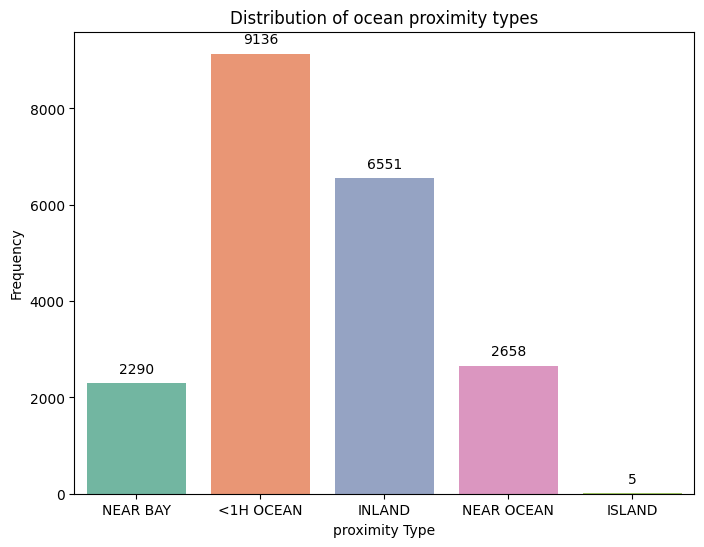

In [12]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='ocean_proximity', palette='Set2')
plt.title('Distribution of ocean proximity types')
plt.xlabel('proximity Type')
plt.ylabel('Frequency')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
plt.show()

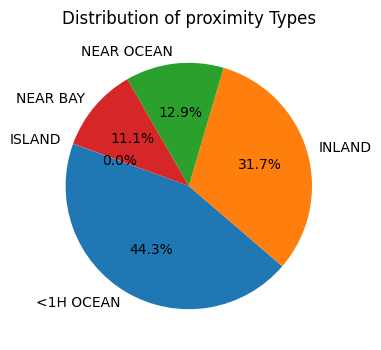

In [13]:
route_type_counts = df['ocean_proximity'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(route_type_counts, labels=route_type_counts.index, autopct='%1.1f%%', startangle=160)
plt.title('Distribution of proximity Types')
plt.show()

# Numerical

In [16]:
def analyze_and_clean_column(df, column_name,outlier_factor):
    # Print descriptive statistics
    print(f"Descriptive Statistics of {column_name}:")
    print(df[column_name].describe())

    # Create a figure with two subplots side by side
    plt.figure(figsize=(14, 6))

    # Plot histogram on the left subplot
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=column_name, bins=20, color='skyblue')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(f'{column_name}')
    plt.ylabel('Frequency')
    skewness = df[column_name].skew()
    plt.text(0.95, 0.95, f'Skewness: {skewness:.2f}', ha='right', va='top', transform=plt.gca().transAxes, fontsize=10, color='black')

    # Plot density plot on the right subplot
    plt.subplot(1, 2, 2)
    sns.kdeplot(data=df, x=column_name, shade=True, color='skyblue')
    plt.title(f'Density Plot of {column_name}')
    plt.xlabel(f'{column_name}')
    plt.ylabel('Density')
    skewness = df[column_name].skew()
    plt.text(0.95, 0.95, f'Skewness: {skewness:.2f}', ha='right', va='top', transform=plt.gca().transAxes, fontsize=10, color='black')

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

    # Calculate quartiles and IQR
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper fences
    lower_fence = Q1 - outlier_factor * IQR
    upper_fence = Q3 + outlier_factor * IQR
    print("Q1:", Q1)
    print("Q3:", Q3)
    print("IQR:", IQR)
    print("Lower Fence:", lower_fence)
    print("Upper Fence:", upper_fence)



    # Filter outliers and clean dataframe
    df_clean = df[(df[column_name] >= lower_fence) & (df[column_name] <= upper_fence)]

    print(f'length before:{len(df)} and length after:{len(df_clean)}')

    plt.figure(figsize=(14,6))
    plt.subplot(2, 2, 1)
    sns.boxplot(data=df, x=column_name, color='skyblue')
    plt.title(f'Boxplot of {column_name}')
    plt.xlabel(f'{column_name}')

    plt.subplot(2, 2, 2)
    sns.violinplot(data=df, x=column_name, color='skyblue')
    plt.title(f'Violin Plot of {column_name}')
    plt.xlabel(f'{column_name}')

    plt.subplot(2, 2, 3)
    sns.boxplot(data=df_clean, x=column_name, color='skyblue')
    plt.title(f'Boxplot of {column_name}')
    plt.xlabel(f'{column_name}')

    plt.subplot(2,2,4)
    sns.violinplot(data=df_clean, x=column_name, color='skyblue')
    plt.title(f'Violin Plot of {column_name}')
    plt.xlabel(f'{column_name}')

    plt.tight_layout()
    plt.show()
    data_retained_percentage = (len(df_clean) / len(df)) * 100
    print(f"Data retained after cleaning: {data_retained_percentage:.2f}%")
    print(f"Number of null values:{df_clean.isnull().sum()}")
    print("--"*90)
    return df_clean

Descriptive Statistics of longitude:
count    20640.000000
mean      -119.569704
std          2.003532
min       -124.350000
25%       -121.800000
50%       -118.490000
75%       -118.010000
max       -114.310000
Name: longitude, dtype: float64


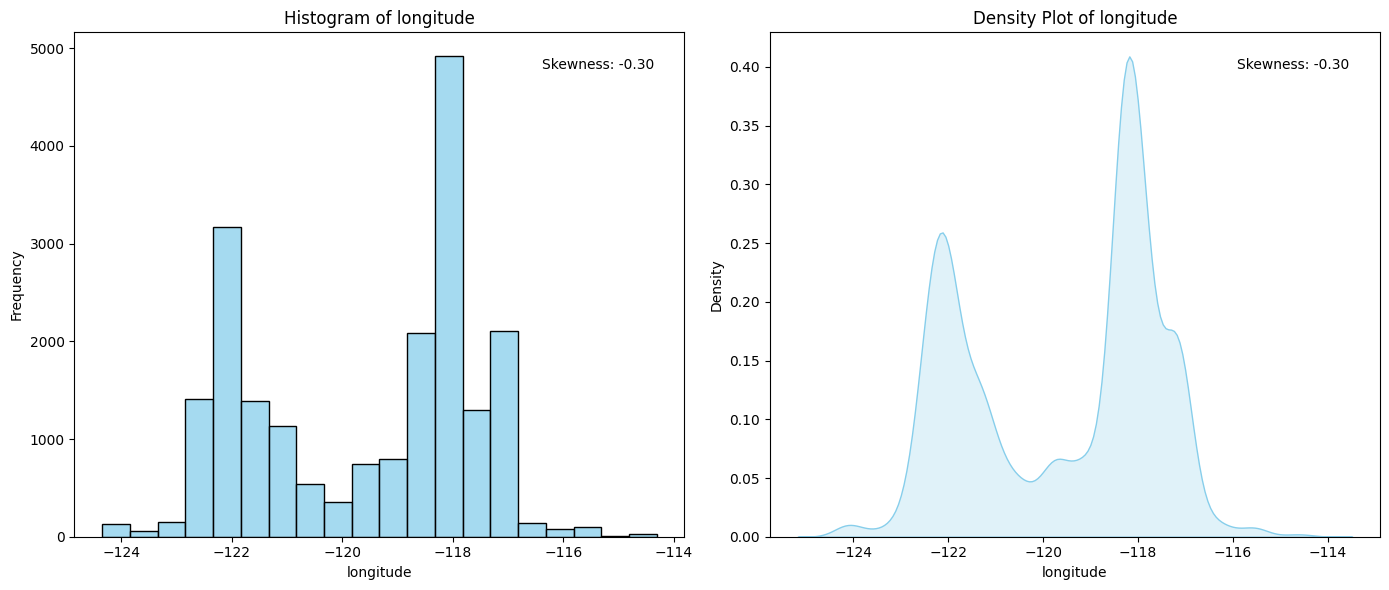

Q1: -121.8
Q3: -118.01
IQR: 3.789999999999992
Lower Fence: -127.48499999999999
Upper Fence: -112.32500000000002
length before:20640 and length after:20640


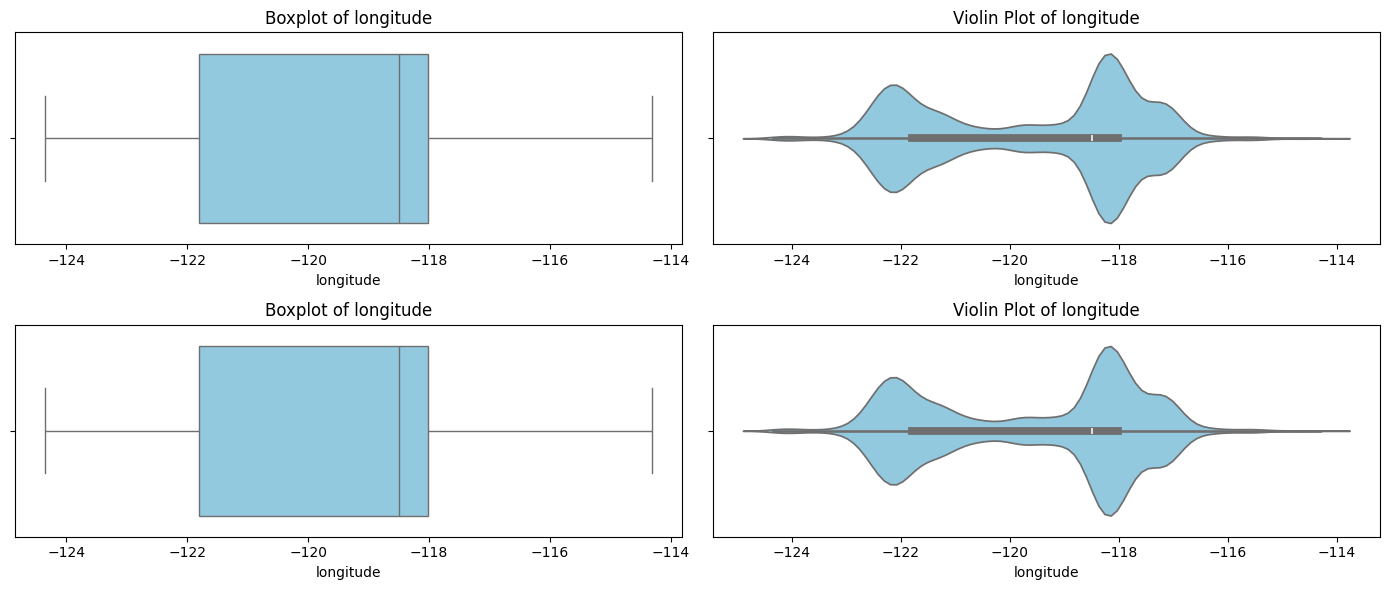

Data retained after cleaning: 100.00%
Number of null values:longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Descriptive Statistics of latitude:
count    20640.000000
mean        35.631861
std          2.135952
min         32.540000
25%         33.930000
50%         34.260000
75%         37.710000
max         41.950000
Name: latitude, dtype: float64


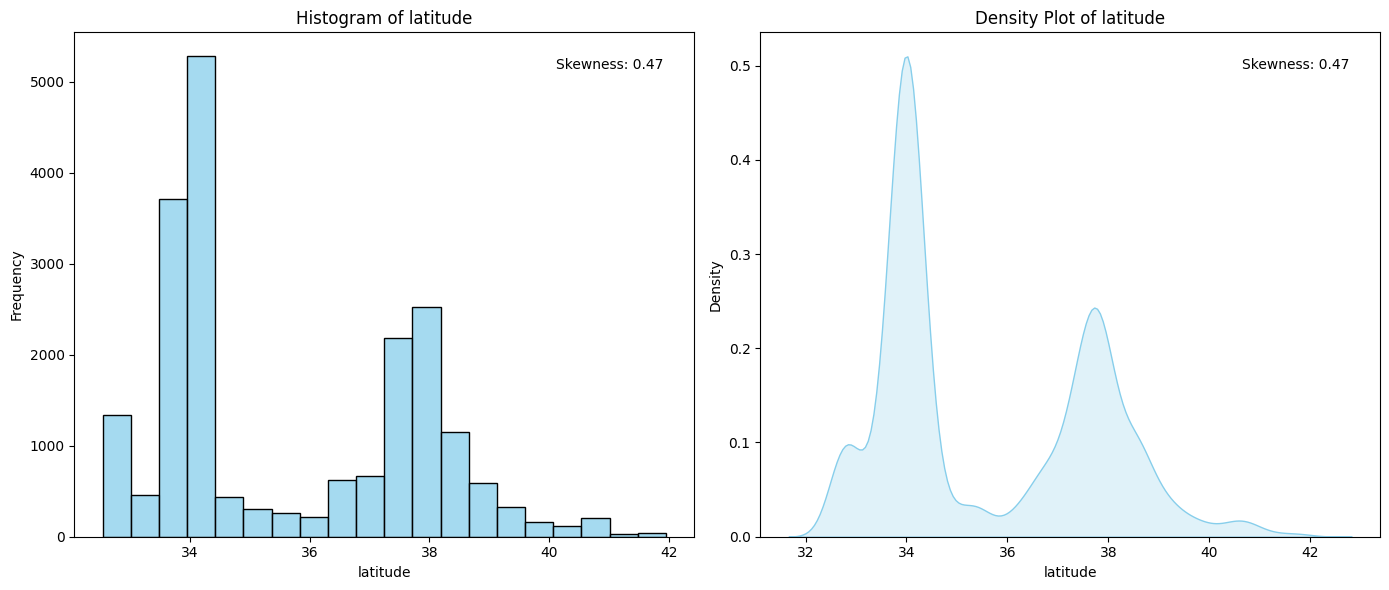

Q1: 33.93
Q3: 37.71
IQR: 3.780000000000001
Lower Fence: 28.259999999999998
Upper Fence: 43.38
length before:20640 and length after:20640


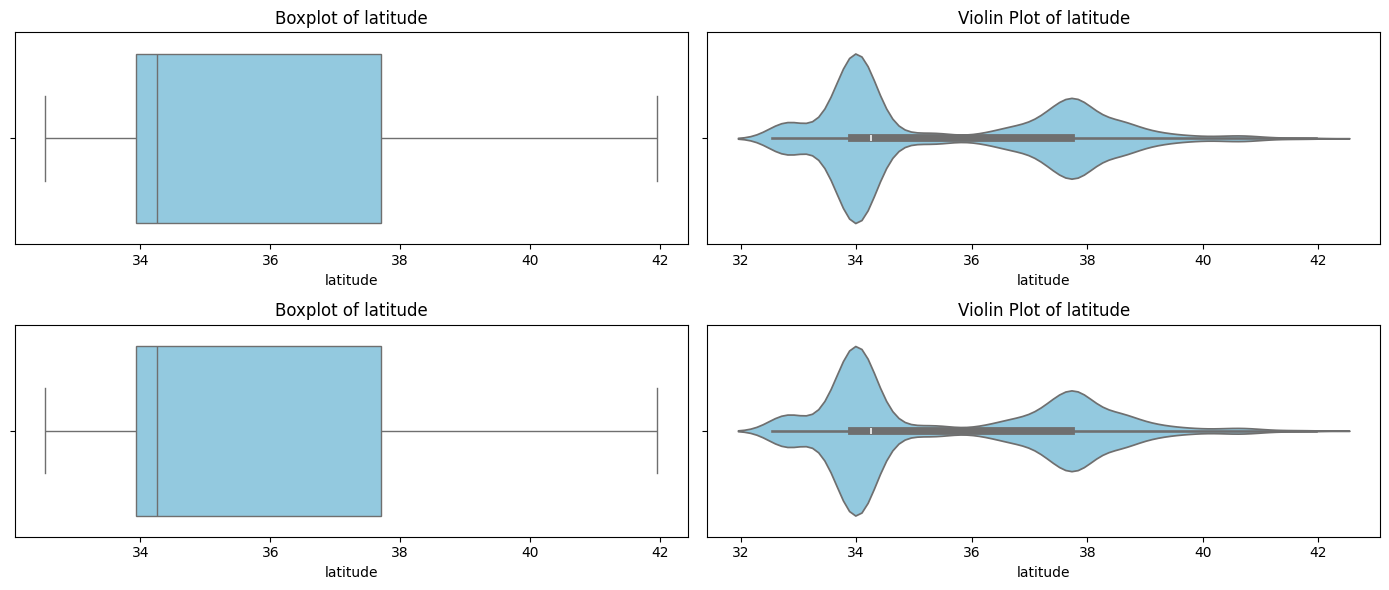

Data retained after cleaning: 100.00%
Number of null values:longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Descriptive Statistics of housing_median_age:
count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64


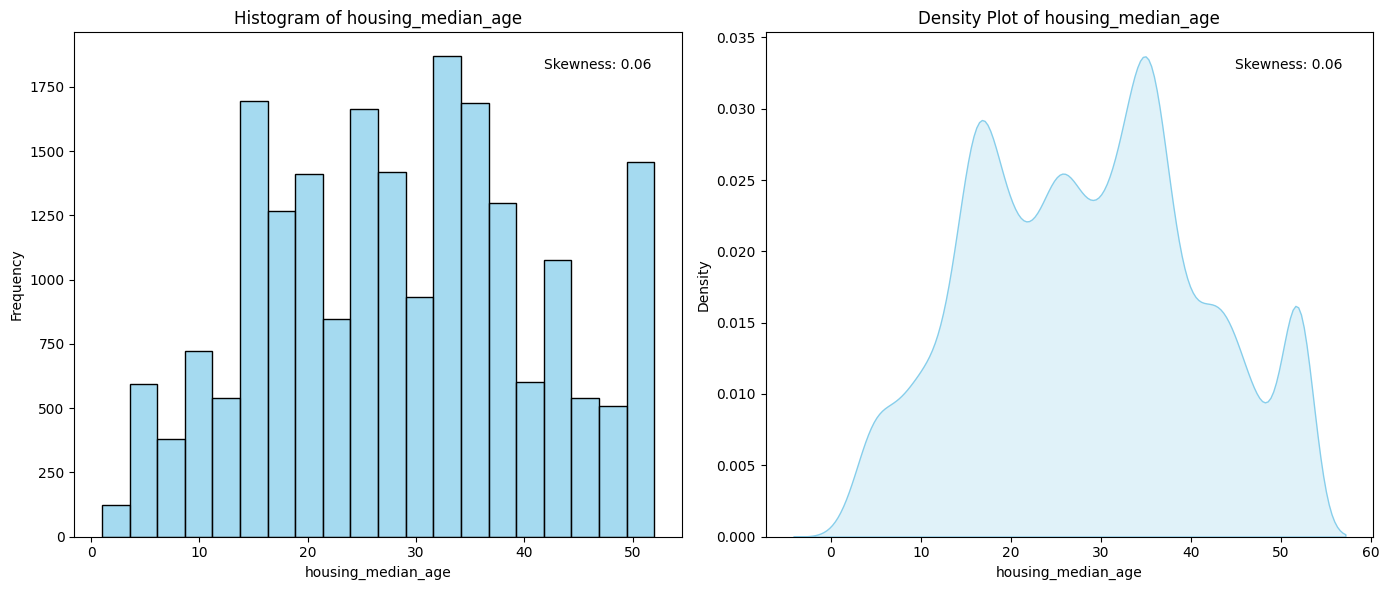

Q1: 18.0
Q3: 37.0
IQR: 19.0
Lower Fence: -10.5
Upper Fence: 65.5
length before:20640 and length after:20640


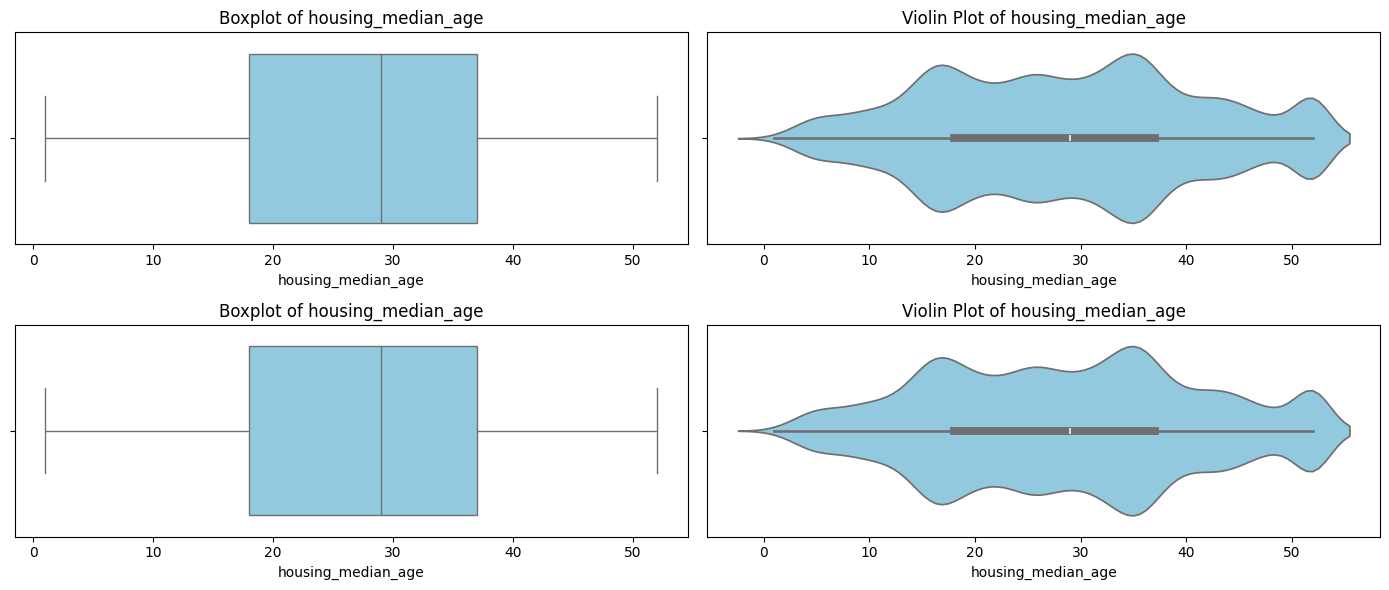

Data retained after cleaning: 100.00%
Number of null values:longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Descriptive Statistics of total_rooms:
count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64


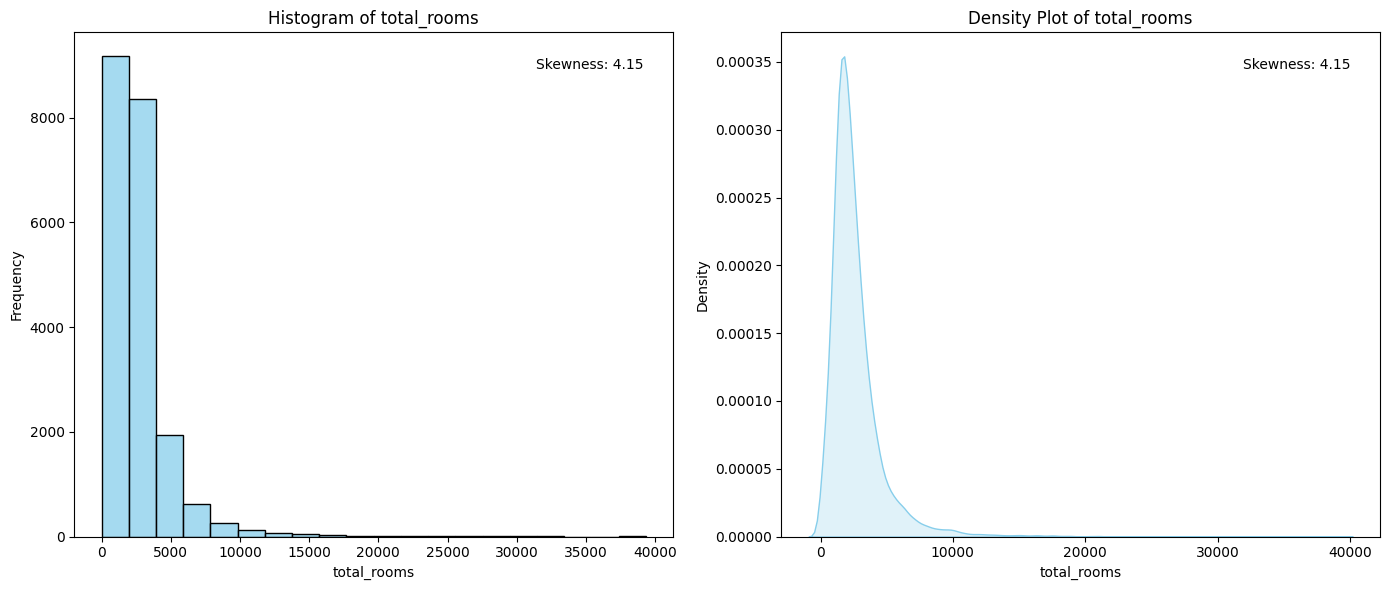

Q1: 1447.75
Q3: 3148.0
IQR: 1700.25
Lower Fence: -1952.75
Upper Fence: 6548.5
length before:20640 and length after:19756


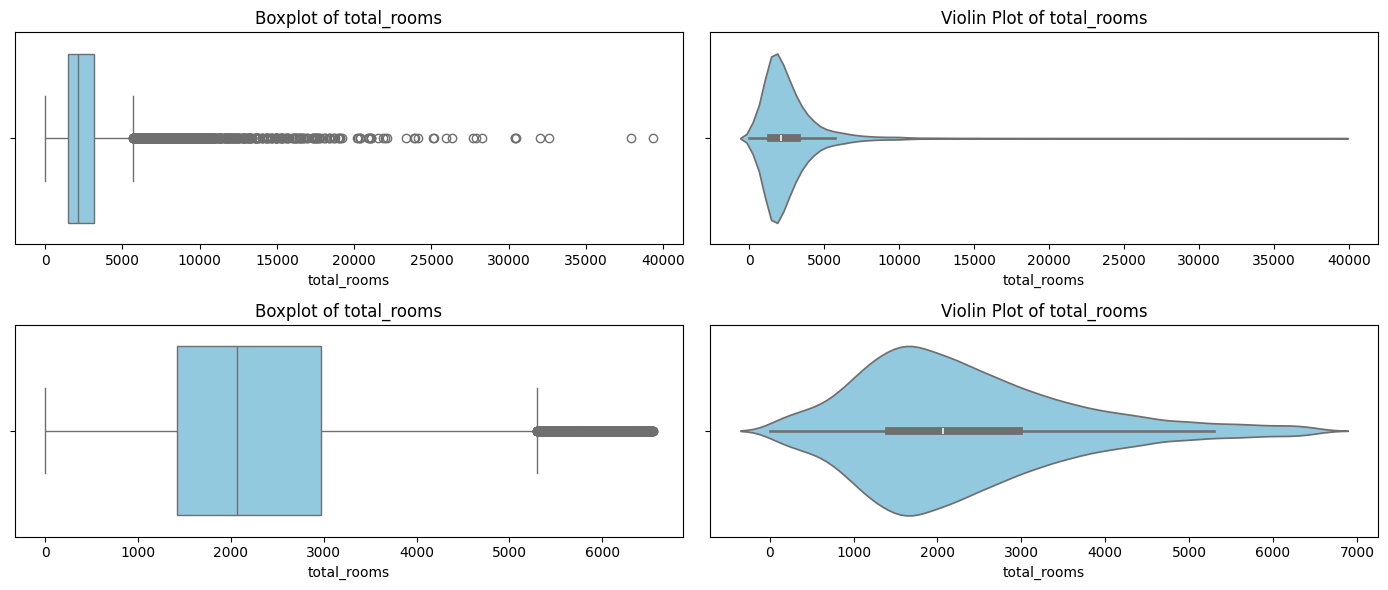

Data retained after cleaning: 95.72%
Number of null values:longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Descriptive Statistics of total_bedrooms:
count    19756.000000
mean       479.026585
std        276.705322
min          1.000000
25%        290.000000
50%        422.000000
75%        611.000000
max       2747.000000
Name: total_bedrooms, dtype: float64


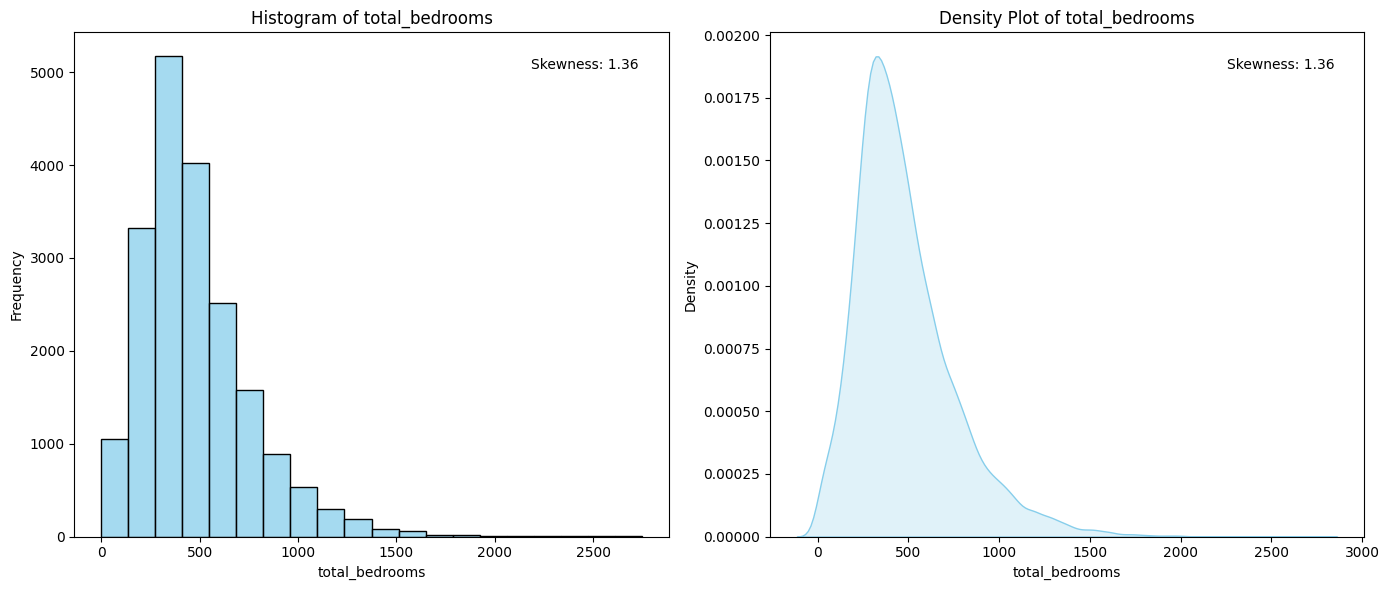

Q1: 290.0
Q3: 611.0
IQR: 321.0
Lower Fence: -352.0
Upper Fence: 1253.0
length before:19756 and length after:19394


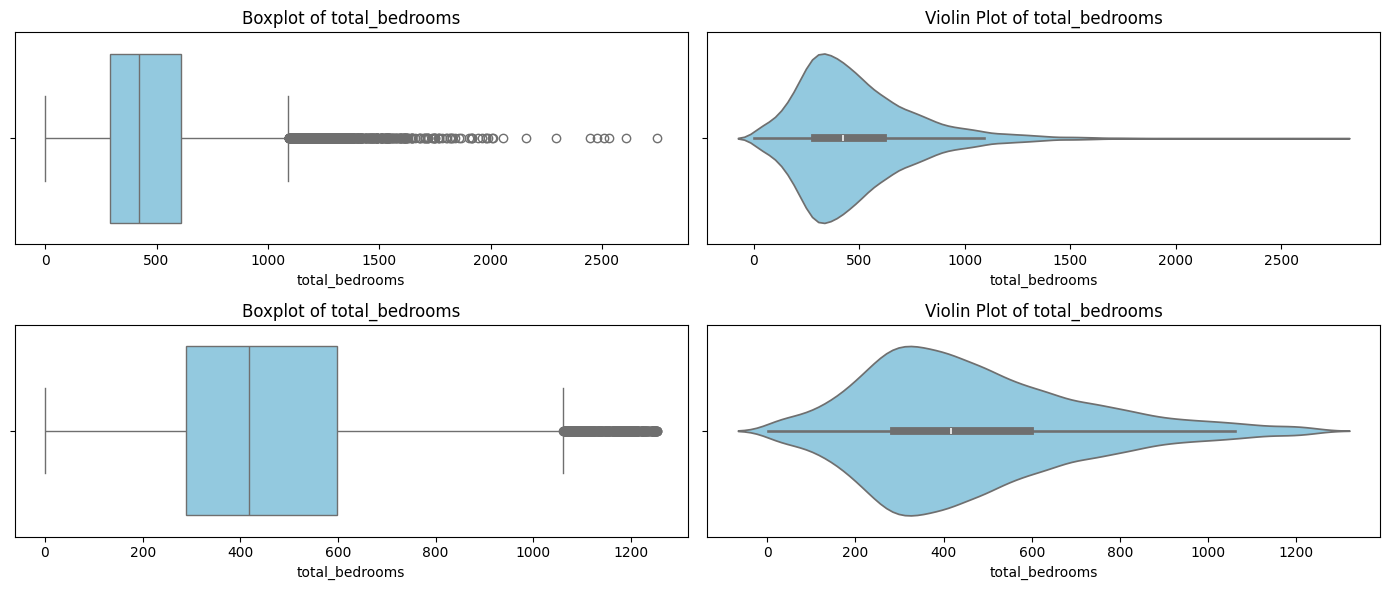

Data retained after cleaning: 98.17%
Number of null values:longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Descriptive Statistics of population:
count    19394.000000
mean      1245.707023
std        703.268618
min          3.000000
25%        766.000000
50%       1121.000000
75%       1595.000000
max       8733.000000
Name: population, dtype: float64


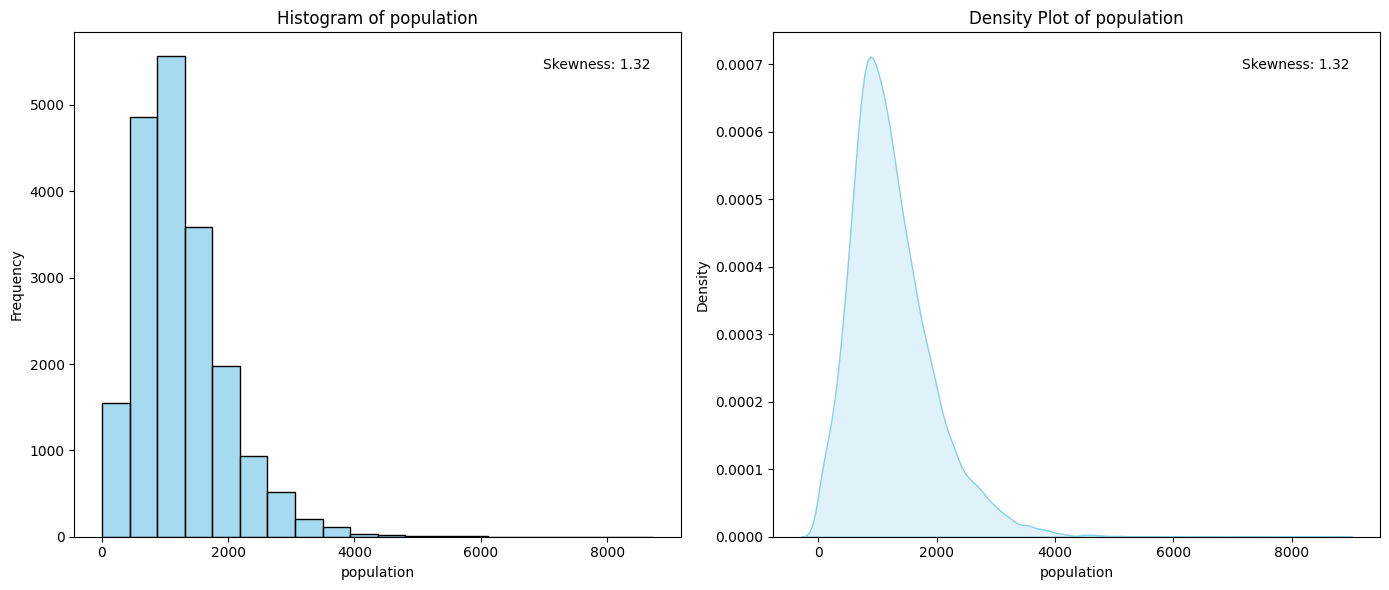

Q1: 766.0
Q3: 1595.0
IQR: 829.0
Lower Fence: -892.0
Upper Fence: 3253.0
length before:19394 and length after:19113


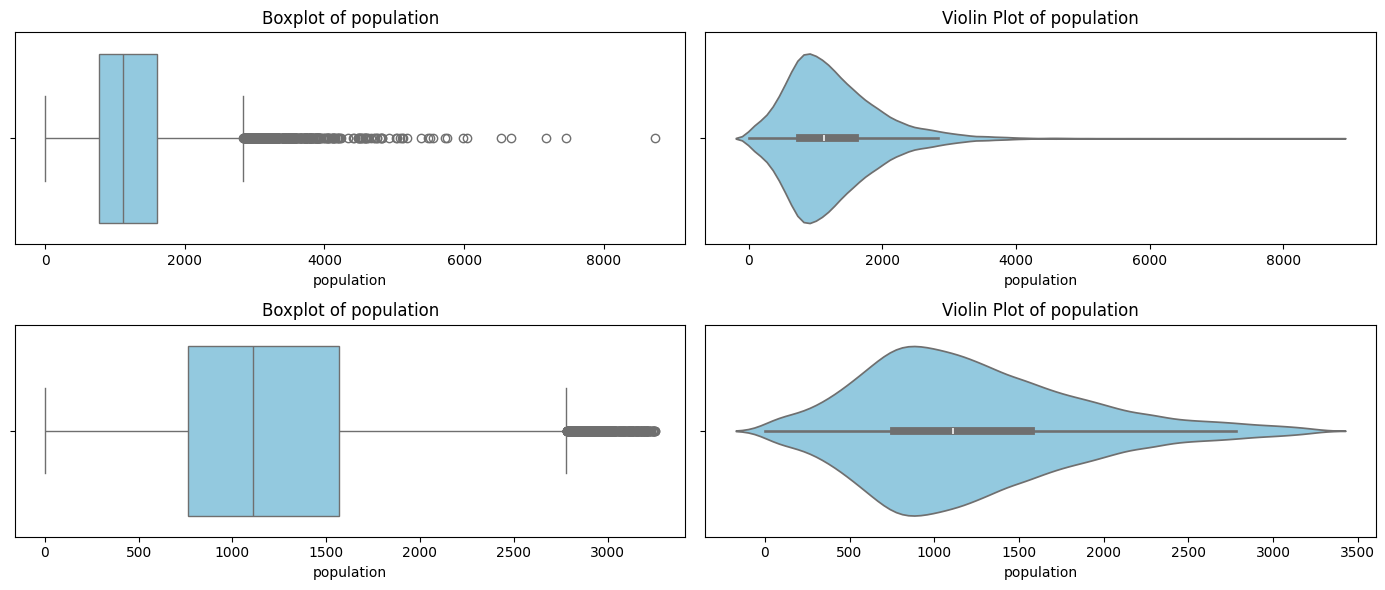

Data retained after cleaning: 98.55%
Number of null values:longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Descriptive Statistics of households:
count    19113.000000
mean       423.998587
std        216.773516
min          1.000000
25%        271.000000
50%        389.000000
75%        549.000000
max       1229.000000
Name: households, dtype: float64


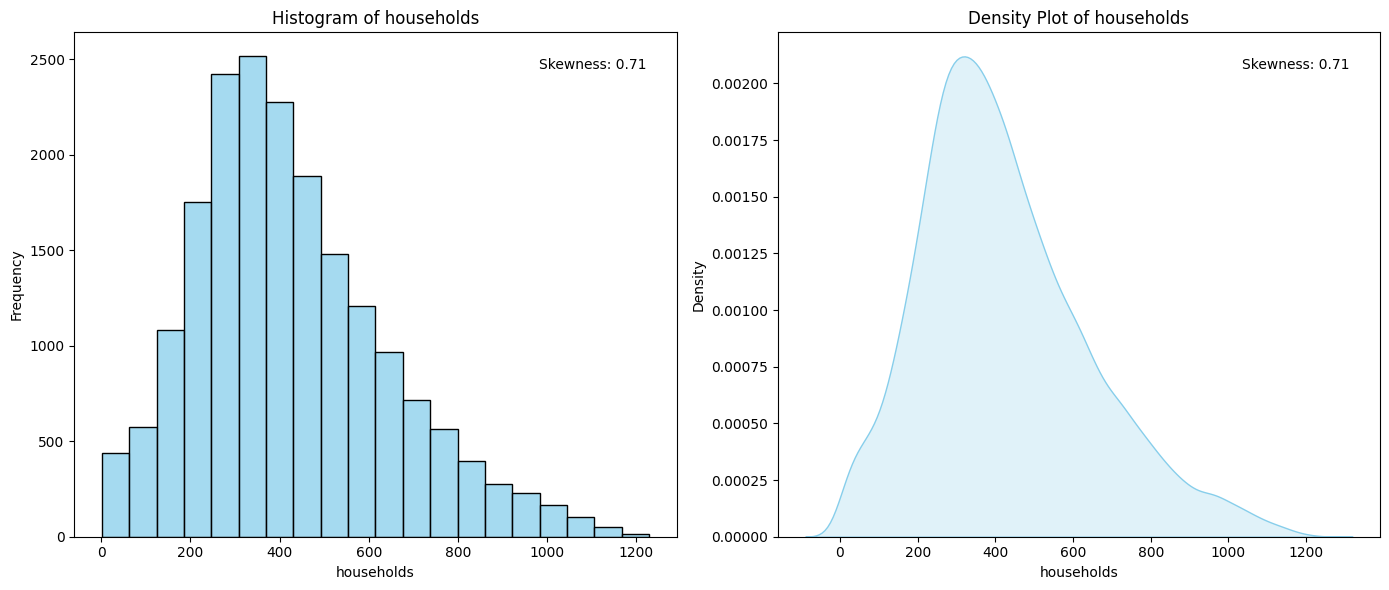

Q1: 271.0
Q3: 549.0
IQR: 278.0
Lower Fence: -146.0
Upper Fence: 966.0
length before:19113 and length after:18717


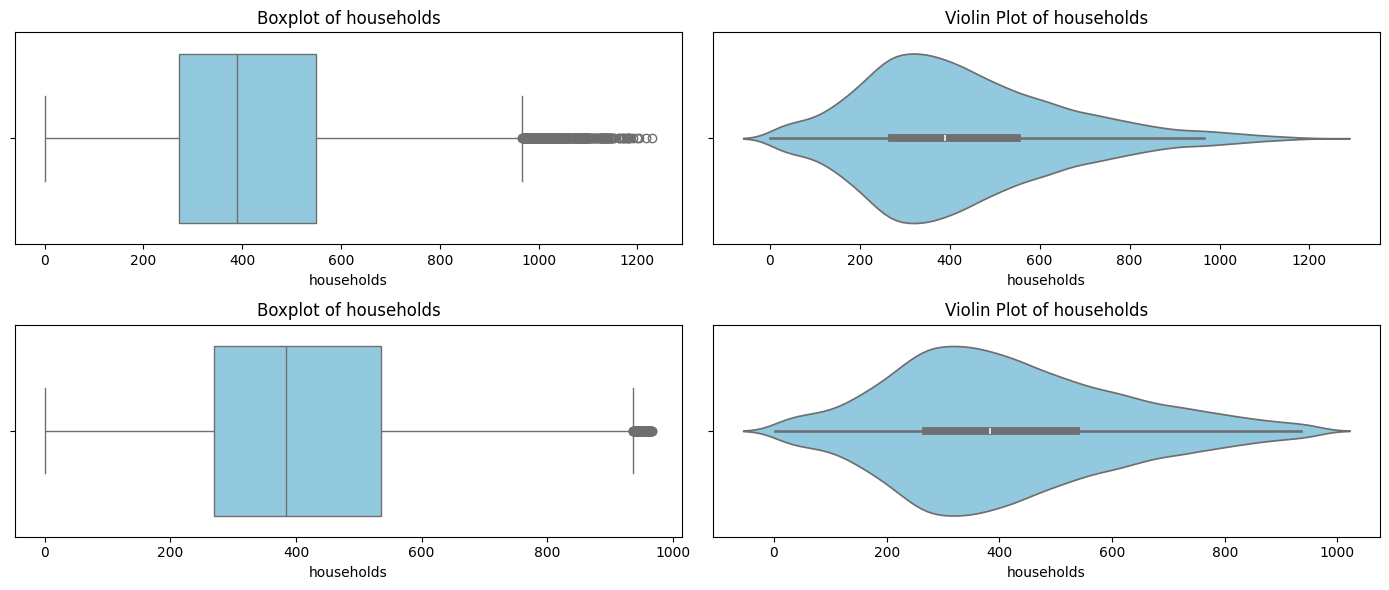

Data retained after cleaning: 97.93%
Number of null values:longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Descriptive Statistics of median_income:
count    18717.000000
mean         3.859998
std          1.912193
min          0.499900
25%          2.547600
50%          3.525000
75%          4.737500
max         15.000100
Name: median_income, dtype: float64


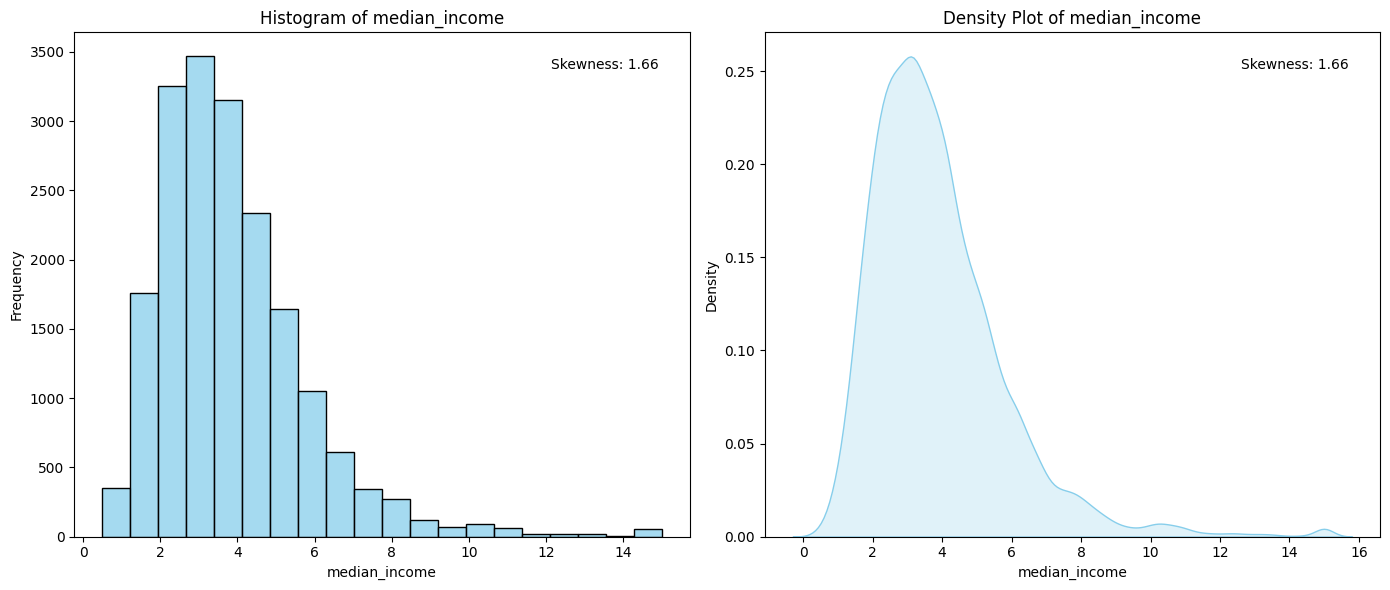

Q1: 2.5476
Q3: 4.7375
IQR: 2.1898999999999997
Lower Fence: -1.8321999999999994
Upper Fence: 9.1173
length before:18717 and length after:18360


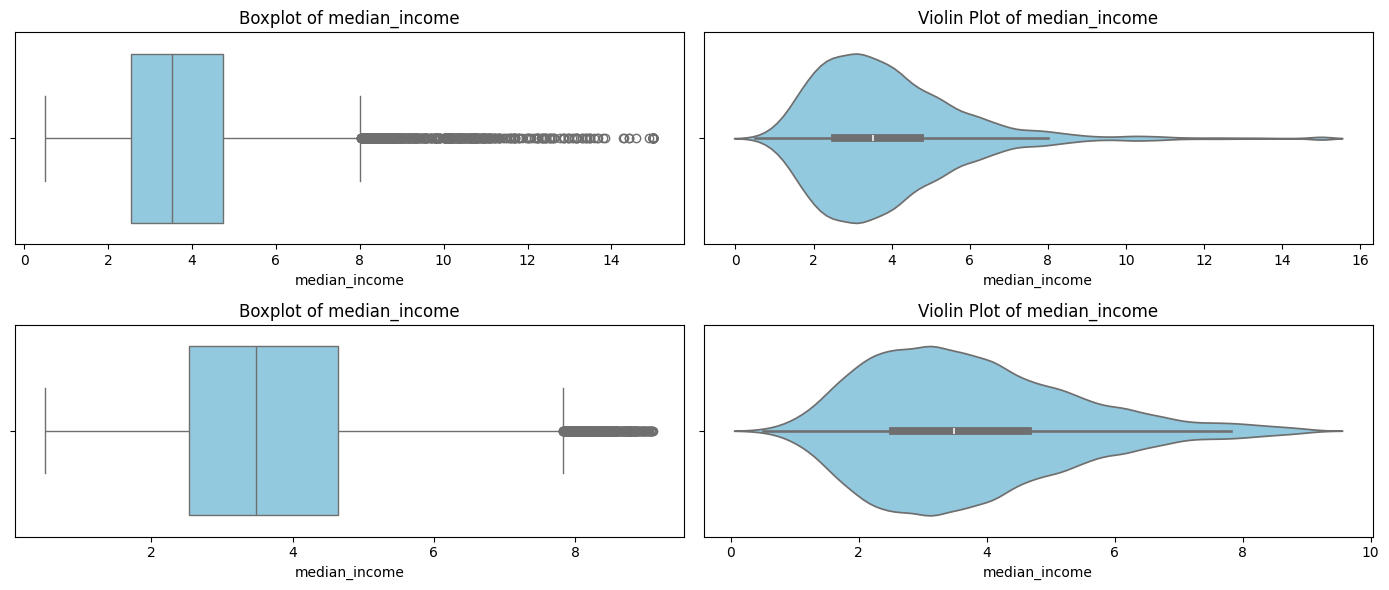

Data retained after cleaning: 98.09%
Number of null values:longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [17]:
df_clean = analyze_and_clean_column(df, 'longitude', 1.5)
df_clean = analyze_and_clean_column(df_clean, 'latitude', 1.5)
df_clean = analyze_and_clean_column(df_clean, 'housing_median_age', 1.5)
df_clean = analyze_and_clean_column(df_clean, 'total_rooms', 2)
df_clean = analyze_and_clean_column(df_clean, 'total_bedrooms', 2)
df_clean = analyze_and_clean_column(df_clean, 'population', 2)
df_clean = analyze_and_clean_column(df_clean, 'households', 1.5)
df_clean = analyze_and_clean_column(df_clean, 'median_income', 2)

* total_rooms feature is highly positive skewed, so need to make it symmetric using transformations.

Text(0, 0.5, 'Sample Quantiles')

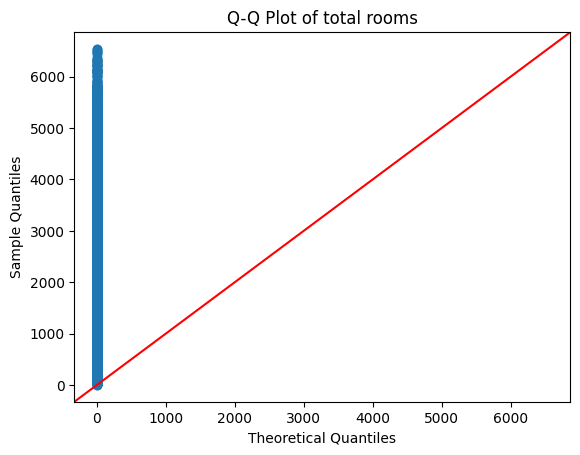

In [18]:
import statsmodels.api as sm
import scipy.stats as stats
sm.qqplot(df_clean['total_rooms'], line ='45')
plt.title('Q-Q Plot of total rooms')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18360 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18360 non-null  float64
 1   latitude            18360 non-null  float64
 2   housing_median_age  18360 non-null  float64
 3   total_rooms         18360 non-null  float64
 4   total_bedrooms      18360 non-null  float64
 5   population          18360 non-null  float64
 6   households          18360 non-null  float64
 7   median_income       18360 non-null  float64
 8   median_house_value  18360 non-null  float64
 9   ocean_proximity     18360 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [20]:
df_clean.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000
mean,-119.598999,35.670706,29.649946,2156.623420,441.613595,1185.178322,412.691885,3.713173,200016.965414
std,2.002510,2.154060,12.314335,1105.089483,215.681685,600.540467,198.930887,1.590438,110269.951378
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.800000,33.940000,19.000000,1382.000000,286.000000,757.000000,270.000000,2.531300,115600.000000
50%,-118.540000,34.280000,30.000000,1989.000000,410.000000,1097.000000,386.000000,3.488450,175000.000000
75%,-118.030000,37.730000,38.000000,2789.000000,575.000000,1538.250000,538.000000,4.648400,256300.000000
max,-114.490000,41.950000,52.000000,6540.000000,1244.000000,3253.000000,966.000000,9.107800,500001.000000


# __Bivariate__
# Numerical-Categorical: (housing_median_age - ocean_proximity)

In [21]:
def num_cat(df,cat,num):
  plt.figure(figsize=(10, 6))
  plt.subplot(1, 2, 1)
  sns.boxplot(data=df_clean, x=cat, y=num,palette='Set2')
  plt.title('Box Plot')

  plt.subplot(1, 2, 2)
  sns.violinplot(data=df_clean, x=cat, y=num,palette='Set2')
  plt.title('Violin Plot')

  plt.tight_layout()
  plt.show()

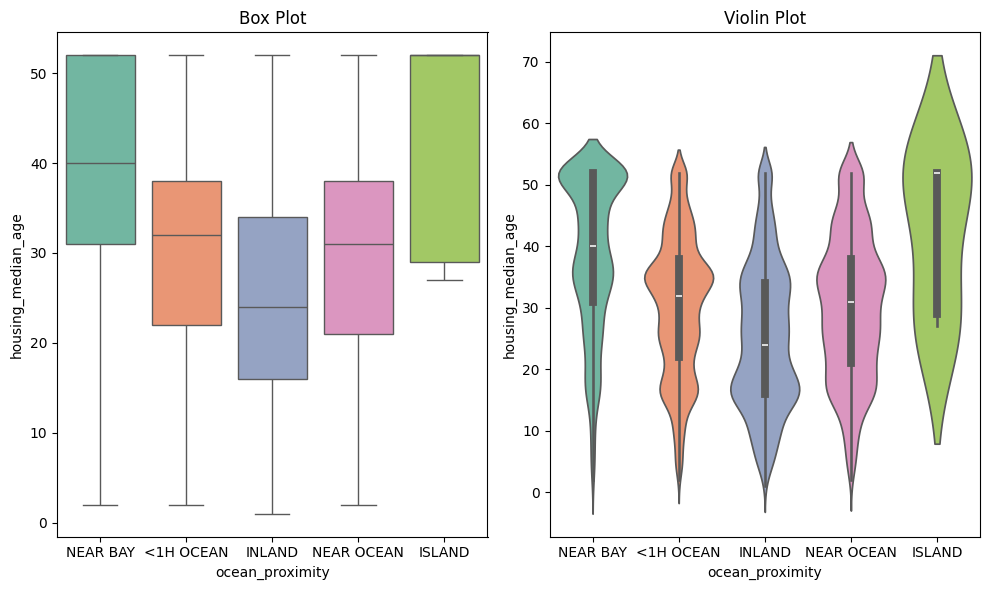

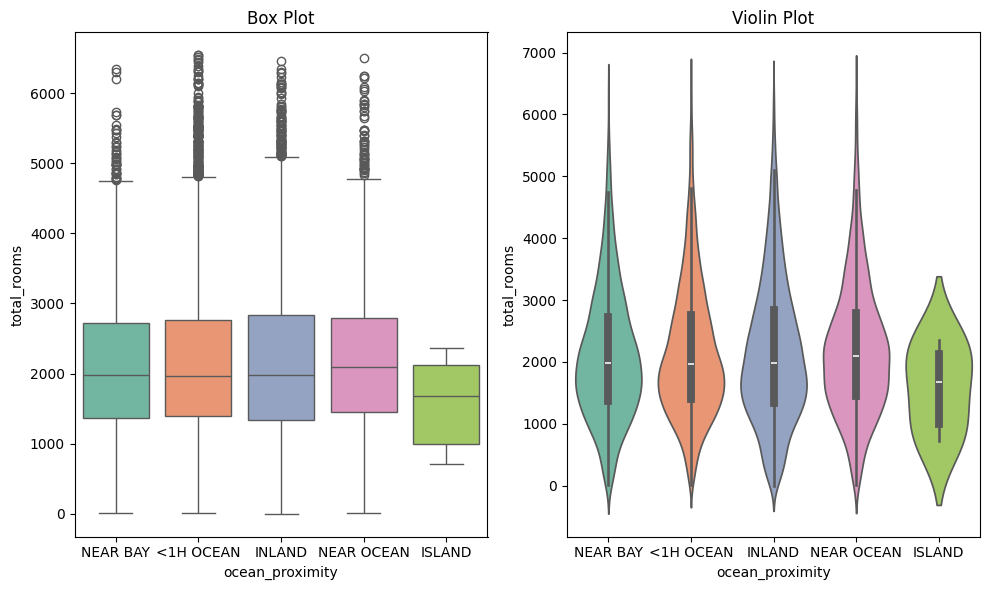

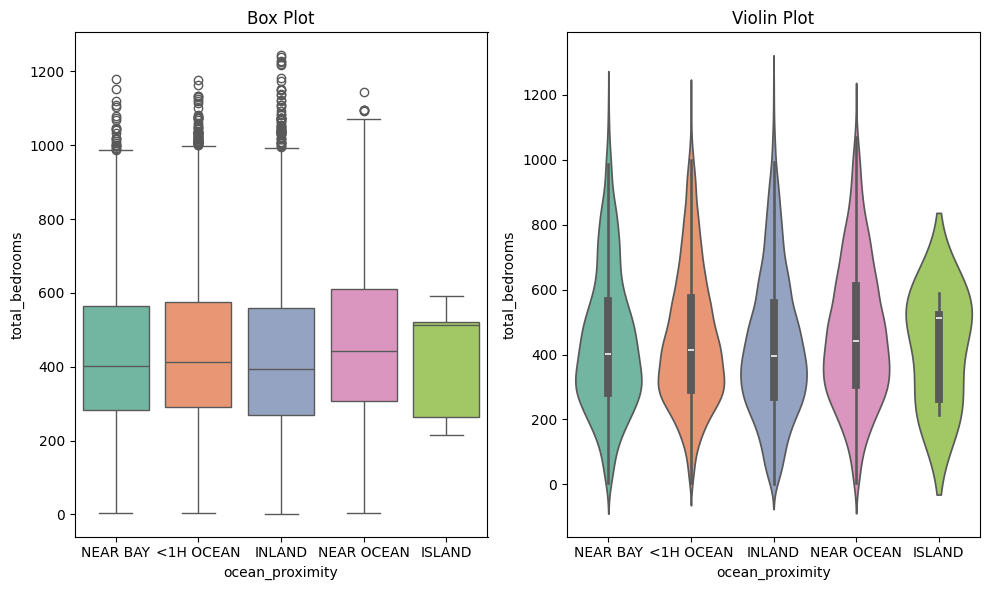

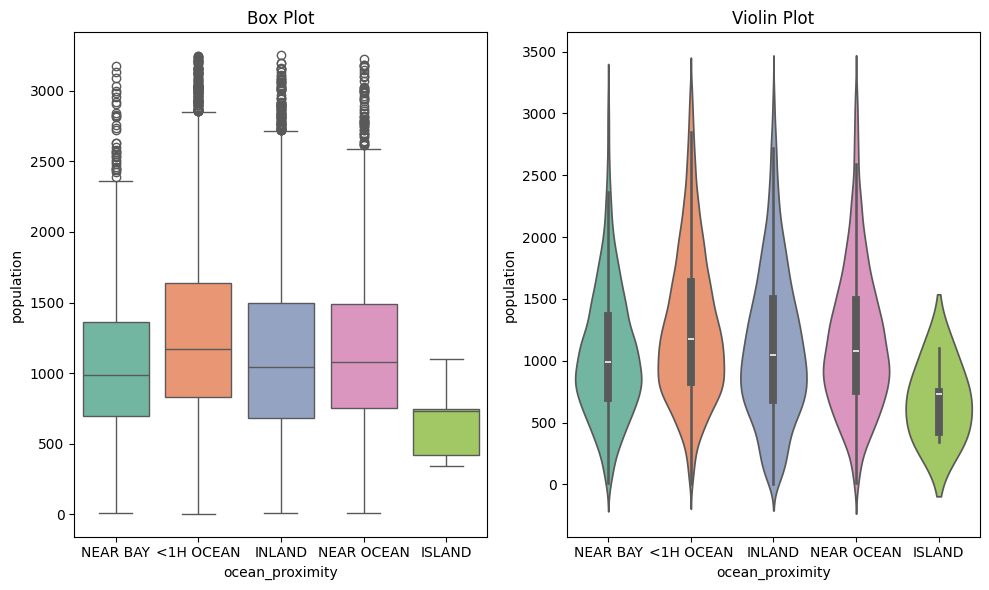

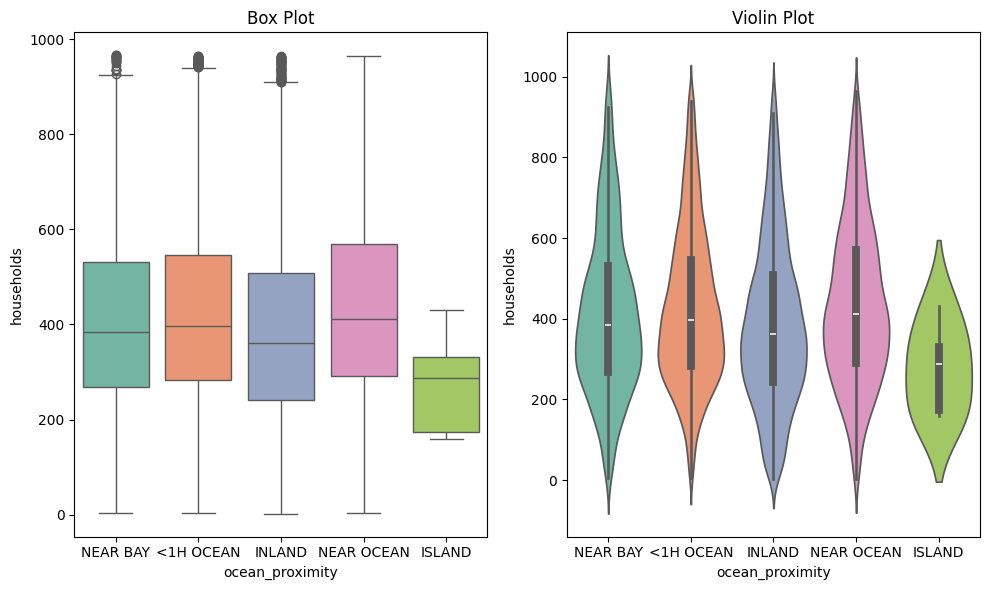

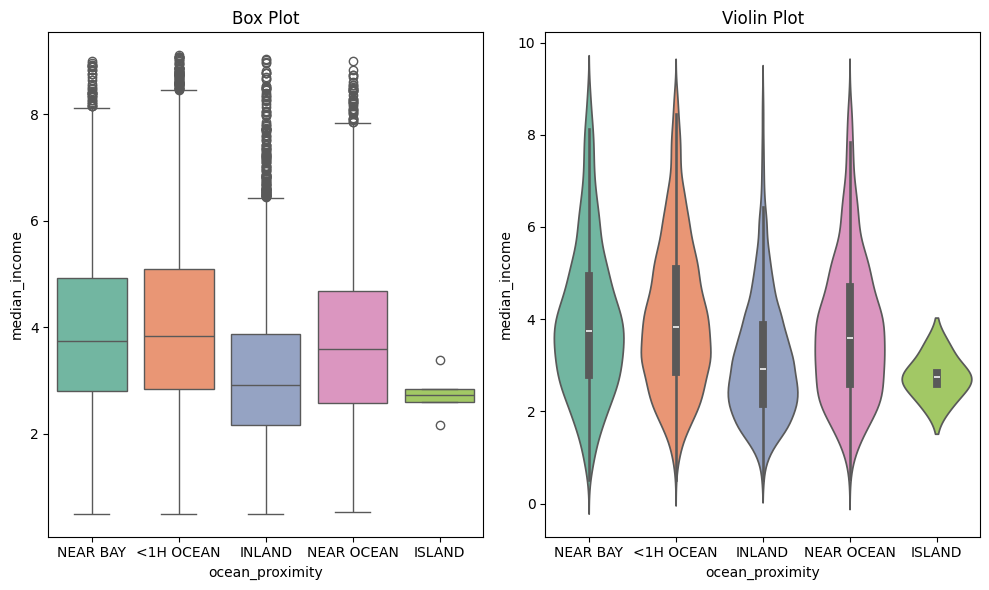

In [22]:
num_cat(df_clean,'ocean_proximity','housing_median_age')
num_cat(df_clean,'ocean_proximity','total_rooms')
num_cat(df_clean,'ocean_proximity','total_bedrooms')
num_cat(df_clean,'ocean_proximity','population')
num_cat(df_clean,'ocean_proximity','households')
num_cat(df_clean,'ocean_proximity','median_income')

In [ ]:
df_clean.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

# Numerical-Numerical

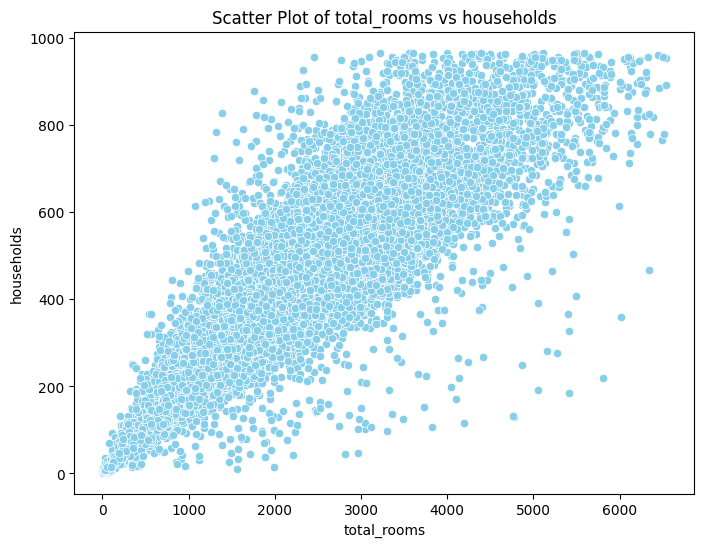

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, x='total_rooms', y='households', color='skyblue')
plt.title('Scatter Plot of total_rooms vs households')
plt.xlabel('total_rooms')
plt.ylabel('households')
plt.show()

In [24]:
correlation = df_clean[['total_rooms', 'households']].corr().iloc[0, 1]
print("Correlation coefficient between total_rooms and households:", correlation)

Correlation coefficient between total_rooms and households: 0.872490557619487


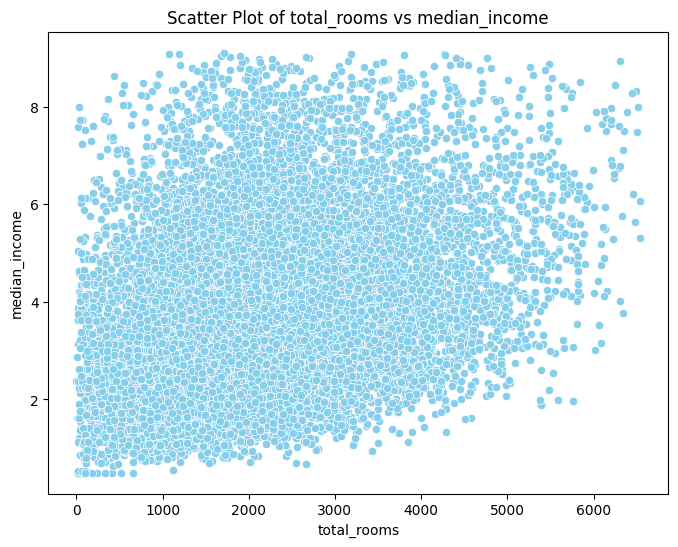

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, x='total_rooms', y='median_income', color='skyblue')
plt.title('Scatter Plot of total_rooms vs median_income')
plt.xlabel('total_rooms')
plt.ylabel('median_income')
plt.show()

In [26]:
correlation_tr_mi = df_clean[['total_rooms', 'median_income']].corr().iloc[0, 1]
print("Correlation coefficient between total_rooms and median_income:", correlation_tr_mi)

Correlation coefficient between total_rooms and median_income: 0.30229646773019986


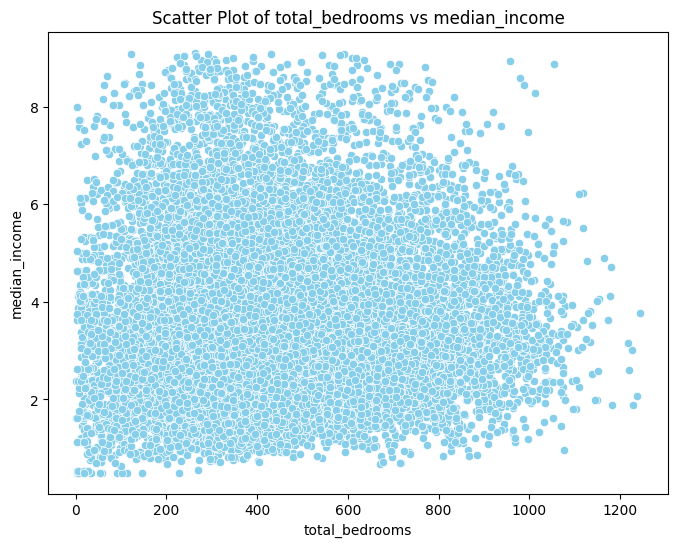

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, x='total_bedrooms', y='median_income', color='skyblue')
plt.title('Scatter Plot of total_bedrooms vs median_income')
plt.xlabel('total_bedrooms')
plt.ylabel('median_income')
plt.show()

In [28]:
correlation_tbr_mi = df_clean[['total_bedrooms', 'median_income']].corr().iloc[0, 1]
print("Correlation coefficient between total_bedrooms and median_income:", correlation_tbr_mi)

Correlation coefficient between total_bedrooms and median_income: -0.015481238089400063


# __Feature Transformation__
### __Feature Construction__

In [29]:
df_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY


In [46]:
df_clean.reset_index(drop=True, inplace=True)

In [47]:
len(df_clean[['ocean_proximity']])

18360

In [48]:
from sklearn.preprocessing import OneHotEncoder

In [49]:
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity

# Fit and transform the 'ocean_proximity' column
encoded_features = encoder.fit_transform(df_clean[['ocean_proximity']])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['ocean_proximity']))

# Concatenate the encoded features with the original DataFrame (excluding the original 'ocean_proximity' column)
df_final = pd.concat([df_clean.drop('ocean_proximity', axis=1), encoded_df], axis=1)


In [50]:
df_final = df_final.reset_index(drop=True)

In [51]:
encoded_df.shape

(18360, 4)

In [52]:
df_clean.shape

(18360, 10)

In [53]:
df_final.shape

(18360, 13)

In [54]:
df_final.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity_INLAND,0


In [55]:
df_final.duplicated().sum()

0

In [56]:
df_final.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,1.0,0.0
1,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,1.0,0.0
2,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0.0,0.0,1.0,0.0


In [57]:
df_final.shape

(18360, 13)

# __Feature Scaling__

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [59]:
y = df_final['median_house_value']
X = df_final.drop('median_house_value', axis=1)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [64]:
df_train_scaled = pd.concat([X_train_scaled, y_train], axis=1)

In [65]:
df_train_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,-1.261784,0.969410,-0.294073,1.002210,0.230949,0.061024,0.606211,1.039522,-0.688876,-0.01167,2.828427,-0.385573,NaN
1,0.510030,-0.683962,0.598304,-0.695516,-0.877970,-0.599756,-0.823043,0.816042,-0.688876,-0.01167,-0.353553,-0.385573,352100.0
2,0.654769,-0.772204,1.652931,0.072395,1.075398,1.771376,0.857841,-1.301988,-0.688876,-0.01167,-0.353553,-0.385573,341300.0
3,-1.171945,0.788282,0.760554,-1.548449,-1.448669,-1.449092,-1.437018,-0.429973,-0.688876,-0.01167,-0.353553,-0.385573,NaN
4,-1.356613,1.053008,1.328430,-0.232418,-0.678457,-0.588076,-0.304687,1.133699,-0.688876,-0.01167,2.828427,-0.385573,269700.0


In [66]:
df_train_scaled.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN',
       'median_house_value'],
      dtype='object')

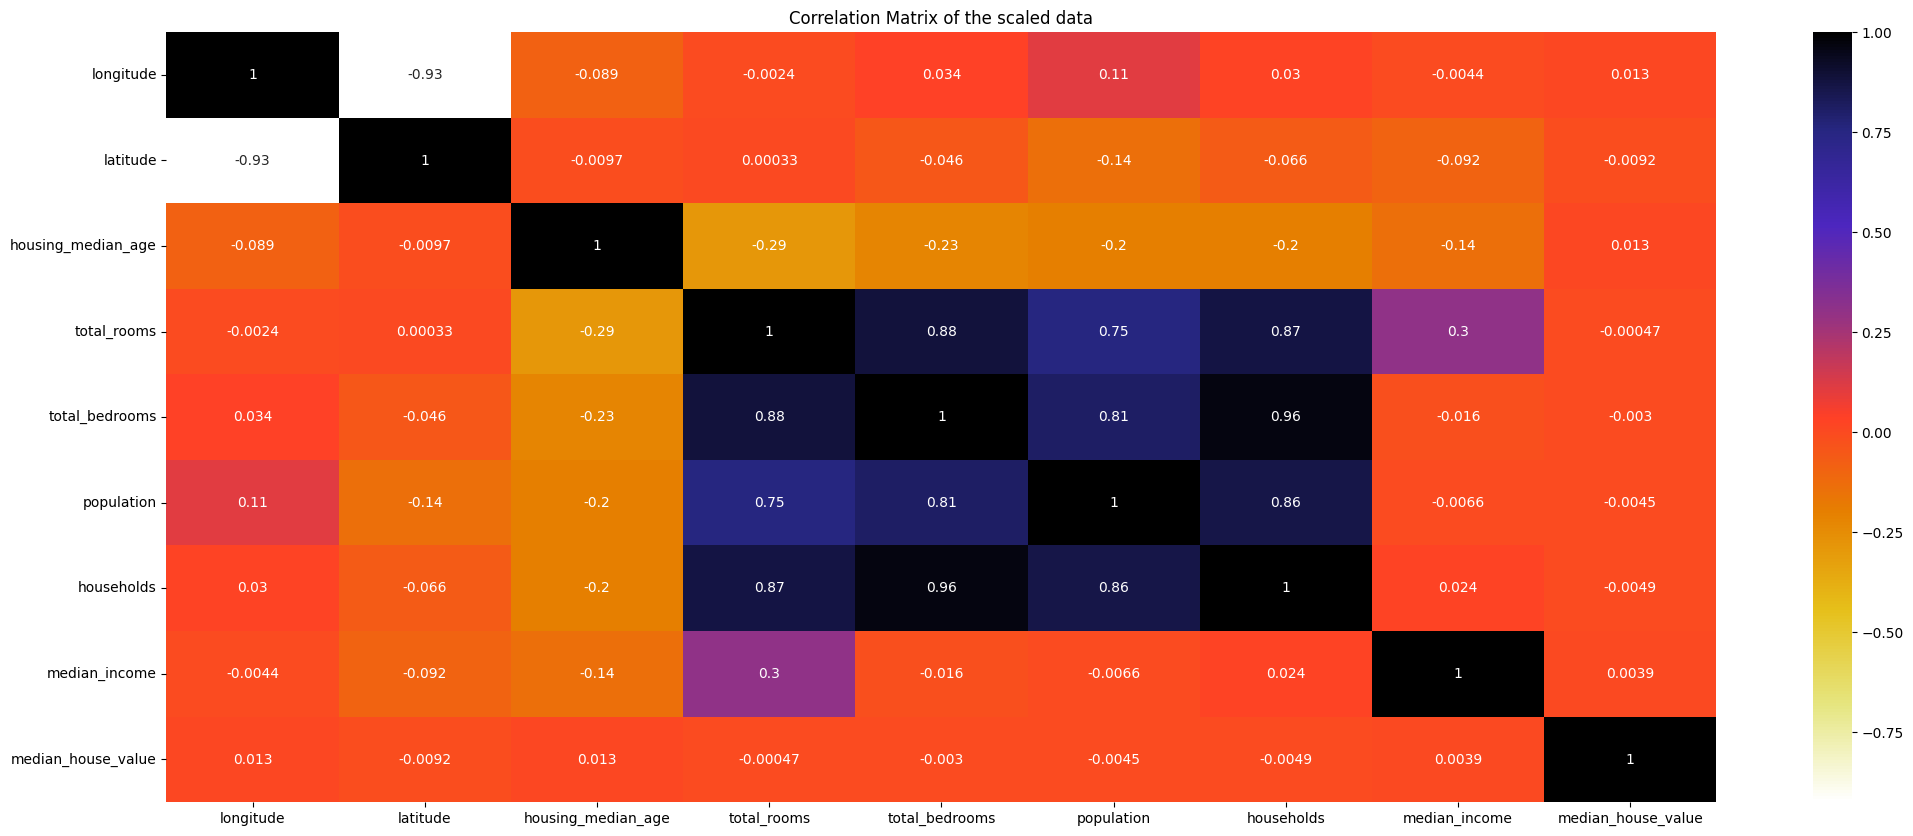

In [67]:
plt.figure(figsize=(25,10))
corr_df = df_train_scaled[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income','median_house_value']].corr()
sns.heatmap(corr_df,annot=True,cmap=plt.cm.CMRmap_r)
plt.title("Correlation Matrix of the scaled data")
plt.show()

In [68]:

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [69]:
corr_features = correlation(X_train_scaled, 0.8)
len(set(corr_features))

4

In [70]:
corr_features

{'households', 'latitude', 'population', 'total_bedrooms'}

In [71]:
X_train_scaled.drop(corr_features,axis=1,inplace=True)
X_test_scaled.drop(corr_features,axis=1,inplace=True)

In [72]:
print(f'training data set shape: {X_train_scaled.shape}')
print(f'test data set shape: {X_test_scaled.shape}')

training data set shape: (14688, 8)
test data set shape: (3672, 8)


#__Model Training and Fine tuning__

In [78]:
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

In [79]:
print(f'final training data set shape: {X_train_final.shape}')
print(f'validation data set shape: {X_val.shape}')

final training data set shape: (11750, 8)
validation data set shape: (2938, 8)


In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


In [74]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
xgb = XGBRegressor()
svm = SVR()

In [81]:
lr.fit(X_train_final,y_train_final)
dt.fit(X_train_final,y_train_final)
rf.fit(X_train_final,y_train_final)
xgb.fit(X_train_final,y_train_final)
svm.fit(X_train_final,y_train_final)

SVR()

In [83]:
y_lr_test_pred = lr.predict(X_val)
y_dt_test_pred = dt.predict(X_val)
y_rf_test_pred = rf.predict(X_val)
y_xgb_test_pred = xgb.predict(X_val)
y_svm_test_pred = svm.predict(X_val)

In [86]:
def calculate_metrics(model,y_t,y_p):

  mean_squared_error_val = mean_squared_error(y_t,y_p)
  r2_score_val = r2_score(y_t,y_p)
  print(f'---------{model}-----------')
  print(f'mean squared error: {mean_squared_error_val}')
  print(f'r2 score: {r2_score_val}')

  return [mean_squared_error_val,r2_score_val]

In [87]:
lr_metrics = calculate_metrics('Linear Regression',y_val,y_lr_test_pred)
dt_metrics = calculate_metrics('Decision Tree',y_val,y_dt_test_pred)
rf_metrics = calculate_metrics('Random Forest',y_val,y_rf_test_pred)
xgb_metrics = calculate_metrics('XGB',y_val,y_xgb_test_pred)
svm_metrics = calculate_metrics('Suport Vector Regressor',y_val,y_svm_test_pred)

---------Linear Regression-----------
mean squared error: 5045711068.895173
r2 score: 0.5775208356865861
---------Decision Tree-----------
mean squared error: 6852048602.087134
r2 score: 0.4262755580496339
---------Random Forest-----------
mean squared error: 3503894361.033623
r2 score: 0.7066176914850368
---------XGB-----------
mean squared error: 3501586762.7369804
r2 score: 0.7068109075028834
---------Suport Vector Regressor-----------
mean squared error: 12479649852.248812
r2 score: -0.04492547601552599


# __Hyperparamter Tuning__

In [88]:
from sklearn.model_selection import  RandomizedSearchCV

In [89]:
def tuning(estimator,paramters,scoring,x_train,y_train):
  random_search  = RandomizedSearchCV(estimator = estimator,
                            param_distributions = paramters,
                            scoring = scoring,
                            n_iter = 100,
                            cv = 3,
                            n_jobs = -1)
  random_search = random_search.fit(x_train, y_train)
  return random_search

In [90]:
scoring='r2'
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}
param_grid_svr = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2, 0.5],
    'gamma': ['scale', 'auto']  # 'scale' = 1 / (n_features * X.var()), 'auto' = 1 / n_features
}

In [91]:
rf_hyper = tuning(RandomForestRegressor(),param_grid_rf,'r2',X_train_final,y_train_final)
xgb_hyper = tuning(XGBRegressor(),param_grid_xgb,'r2',X_train_final,y_train_final)
svm_hyper = tuning(SVR(),param_grid_svr,'r2',X_train_final,y_train_final)

In [96]:
def print_res(model,X,y):
  # print(f'best parameters: {model.best_params_}')
  print(f'mean squared error: {mean_squared_error(y,model.predict(X))}')
  print(f'r2 score: {r2_score(y,model.predict(X))}')


In [97]:
print_res(rf_hyper,X_val,y_val)
print_res(xgb_hyper,X_val,y_val)
print_res(svm_hyper,X_val,y_val)

mean squared error: 942331650.859726
r2 score: 0.9210982390934902
mean squared error: 1826884495.592441
r2 score: 0.8470343179669961
mean squared error: 5405673030.249262
r2 score: 0.5473810939255122


In [94]:
rf_hyper.fit(X_train_scaled, y_train)
xgb_hyper.fit(X_train_scaled, y_train)
svm_hyper.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'epsilon': [0.01, 0.1, 0.2, 0.5],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   scoring='r2')

In [98]:
print_res(rf_hyper,X_test_scaled,y_test)
print_res(xgb_hyper,X_test_scaled,y_test)
print_res(svm_hyper,X_test_scaled,y_test)


mean squared error: 3343928693.0037236
r2 score: 0.7322511018565032
mean squared error: 3297834802.20376
r2 score: 0.7359418469667858
mean squared error: 5567125468.464173
r2 score: 0.5542393852098146
